In [220]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Fichier Liste de filleuls.xlsx

In [251]:
filleuls = pd.read_excel('../data/Liste des filleuls VF.xlsx', encoding='utf-8')
filleuls.rename(columns={'Identifiant parrainage ':'Identifiant parrainage'}, inplace=True)

In [252]:
# Drop rows with no Identifiant parrainage
filleuls = filleuls.dropna(subset=["Identifiant parrainage"])

# change type to merge
filleuls["Identifiant parrainage"] = filleuls["Identifiant parrainage"].astype('int')

In [253]:
filleuls.head()

,Identifiant filleul,Identifiant parrain,Identifiant parrainage,Sexe,Formation actuelle,Sous-formation actuelle,Statut filleul,Code formation,Lycée du bac,Ville du lycée du bac,...,Etat de l'encordage,Suivi Encordage,Date de l'encordage,Suivi Autre,Motif Annulation,Commentaire programme dédié,Documents reçus,Qualité de l'engagement et réactivité,Evaluation parrainage,Soutien financier hors état
0,1,909.0,1050,H,Ecole de commerce (après bac+2),4ème année,Ancien,3 : Commerce / Finance / Gestion,Arthur Rimbaud,Sin-le-Noble,...,Non encordé(e),NaN,NaN,reporting : SAFRAN Situation financière: 30/...,NaN,Reporting Safran 2010,Non,A : Très bonne,NaN,NaN
2,4,1516.0,1735,F,CPGE Commerce,ECT ? 1ère année,Parrainé,3 : Commerce / Finance / Gestion,NC,NC,...,Non encordé(e),NaN,NaN,NaN,NaN,NaN,Oui,C : Moyenne,B : Le parrainage se passe bien,Non.
3,5,674.0,772,H,Université - Sciences,Autre,Disponible,1 : Ingénieurs / Sciences dures,BUS Blaise Pascal,Reggio nell'Emilia,...,Non encordé(e),NaN,NaN,Fev-16 : (HM) A parrainer si on a un parrain s...,manque de motivation parrain,NaN,Non,C : Moyenne,C : Le parrainage fonctionne correctement,NaN
4,6,1967.0,2246,F,Université - Droit,L2 Droit/Sciences politiques,Parrainé,3 : Commerce / Finance / Gestion,NC,NC,...,Non encordé(e),NaN,NaN,NaN,NaN,NaN,Non,C : Moyenne,B : Le parrainage se passe bien,NaN
5,7,1215.0,1413,H,Autres,Autre (à renseigner),Sorti,1 : Ingénieurs / Sciences dures,Lycée Jacques Feyder,Epinay-sur-Seine,...,Non encordé(e),NaN,NaN,Boursiers Jean Guyot 2009-2010 Situation fina...,NaN,NaN,Oui,A : Très bonne,NaN,NaN


In [254]:
filleuls[u"Evaluation parrainage"].value_counts()

B : Le parrainage se passe bien              670
C : Le parrainage fonctionne correctement    350
A : Le parrainage se passe très bien         208
Non encore parrainé                          151
D : Le parrainage ne se passe pas bien       134
E : Le parrainage ne fonctionne pas           90
Name: Evaluation parrainage, dtype: int64

In [255]:
map_eval_fil = {u"A : Le parrainage se passe tr\xe8s bien" : 1,
                'B : Le parrainage se passe bien' : 1,
                'C : Le parrainage fonctionne correctement' : 1,
                'D : Le parrainage ne se passe pas bien' : 0,
                'E : Le parrainage ne fonctionne pas' : 0}

In [256]:
filleuls['target'] = filleuls[u"Evaluation parrainage"].map(map_eval_fil)

Il y a 622 lignes ou il n'y a pas d'évalutation.

In [257]:
filleuls['target'].value_counts()

1.0    1228
0.0     224
Name: target, dtype: int64

In [258]:
filleuls = filleuls.dropna(subset=['target'])

In [259]:
filleuls.groupby([u"Evaluation parrainage", 'target']).size()

Evaluation parrainage                      target
A : Le parrainage se passe très bien       1.0       208
B : Le parrainage se passe bien            1.0       670
C : Le parrainage fonctionne correctement  1.0       350
D : Le parrainage ne se passe pas bien     0.0       134
E : Le parrainage ne fonctionne pas        0.0        90
dtype: int64

In [260]:
filleuls.target.value_counts(normalize=True)

1.0    0.84573
0.0    0.15427
Name: target, dtype: float64

Il y a 15,6 % des parainages qui ne sont pas satisfaisant

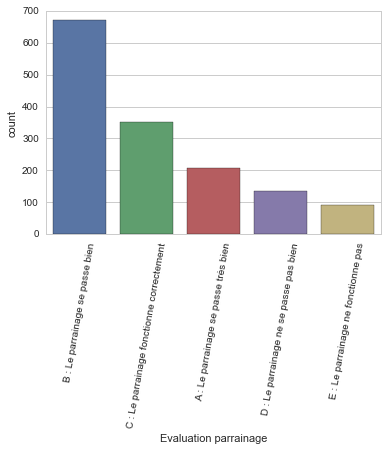

In [261]:
ax = sns.countplot(x=u"Evaluation parrainage", data=filleuls)
ax.set_xticklabels(filleuls[u"Evaluation parrainage"].unique().tolist(), rotation=80)

In [262]:
## Diplome

In [263]:
filleuls[u"Formation actuelle"].value_counts()

Ecole de commerce (après bac+2)       266
Ecole d?ingénieurs (après bac+2)      187
CPGE Scientifique                     126
Université - Droit                    121
CPGE Commerce                         117
Université - Economie / Gestion        95
Institut d'Etudes Politiques           87
Autres                                 58
Université - IUT                       43
Université - Sciences                  38
Université - Autres                    36
Université - Médecine                  36
Université - Lettres / langues         35
Ecole d?ingénieurs (après bac)         29
CPGE Littéraire                        29
Ecole de commerce (après bac)          21
BTS                                    20
Université - Sciences Humaines         19
CPGE Economie - Droit                  18
Université - Histoire / Géographie     17
Ecole Normale Supérieure               15
Ecole d?arts                           11
Diplôme de Comptabilité et Gestion      7
Ecole d'agronomie                 

## Parrains

In [276]:
parrains = pd.read_excel('../data/Liste des parrains VF.xlsx', encoding='utf-8')

parrains.rename(columns={'Identifiant parrainage ':'Identifiant parrainage'}, inplace=True)


In [279]:
# Drop row with no id
parrains = parrains.dropna(subset=["Identifiant parrain ", "Identifiant filleul", "Identifiant parrainage"]) # 1 row

# change type to merge
parrains["Identifiant parrainage"] = parrains["Identifiant parrainage"].astype('int')

In [280]:
parrains.head()

,Identifiant parrain,Identifiant filleul,Identifiant parrainage,Diplôme Principal,Précision diplôme principal,Etablissement du diplôme principal,Ville établissement diplôme principal,Année diplôme,Niveau diplôme,Autre formation,...,A déjà eu un parrainage annulé ?,Temporairement indisponible,Suivi parrainage 1,Suivi parrainage 2,Suivi parrainage 3,Suivi Evènements,Programmes dédiés et reporting,Quel engagement souhaitez-vous proposer à Frateli ?,Code filière,Disponible pour un parrainage supplémentaire
0,5,2369.0,7,Université/Ecole - Lettres/langues/édition,Chef de projets Traduction,Université Paris 7 - Diderot,Paris,2011.0,Bac +5,NaN,...,Non,Non,"07/03/2016 GD bons échanges avec Chaymae, fill...",NaN,NaN,NaN,Reporting Safran,parrain post-bac,Industrie santé,Non
1,8,202.0,11,Ecole d'ingénieur après bac+2 - logistique/man...,NaN,Institut National des Sciences Appliquées (INS...,Lyon,2011.0,Bac +5,Ecole de commerce - autre,...,Non,Non,NaN,NaN,NaN,NaN,Aucun,parrain post-bac,NaN,Non
2,11,335.0,14,Ecole d'ingénieur après bac+2 - finance/économie,X / Harvard,Ecole Polytechnique,PALAISEAU,NaN,Bac +5,Université - finance/économie,...,Non,Non,06/09/2010 (mail) : Tjrs en Afrique du sud. Va...,NaN,NaN,NaN,Aucun,parrain post-bac,NaN,Non
3,12,1115.0,15,Ecole de commerce - autre,ESSCA - ESC post bac en 5 ans,Ecole Supérieure des Sciences Commerciales d'A...,Boulogne-Billancourt,NaN,Bac +5,NaN,...,Oui,Non,01/03/15 : mail De mon côté tout se passe très...,NaN,NaN,NaN,Aucun,parrain post-bac,"Finance/Banque/Assurance,Communautés professio...",Non
4,13,1085.0,18,Ecole de commerce après bac+2 -achat/marketing...,NaN,France Business School,Amiens Campus,1994.0,Bac +5,NaN,...,Non,Oui,15/12/14 : mail sp : je le relance pour qu'il ...,NaN,NaN,NaN,Aucun,parrain post-bac,NaN,Non


In [281]:
parrains.shape

(1705, 56)

## Merging parains / filleuls

In [285]:
data = pd.merge(filleuls, parrains, how='inner', on="Identifiant parrainage", suffixes=('_f', '_p'))

In [283]:
parrains.shape

(1705, 56)

In [286]:
data.shape

(962, 125)

In [271]:
data.head()

,Identifiant filleul_f,Identifiant parrain,Identifiant parrainage,Sexe,Formation actuelle,Sous-formation actuelle,Statut filleul,Code formation,Lycée du bac,Ville du lycée du bac,...,Programmes dédiés et reporting_p,Ville.1,Programmes dédiés et reporting.1,Date de création,Statut,Date de lancement parrainage,Date de fin,Motif Annulation_p,Unnamed: 12,Unnamed: 13
0,4,1516.0,1735,F,CPGE Commerce,ECT ? 1ère année,Parrainé,3 : Commerce / Finance / Gestion,NC,NC,...,Aucun,Reims,1 Quizz,2014-11-14 12:06:54,LANCE,2014-11-18 14:51:06,NaN,NaN,NaN,NaN
1,5,674.0,772,H,Université - Sciences,Autre,Disponible,1 : Ingénieurs / Sciences dures,BUS Blaise Pascal,Reggio nell'Emilia,...,Aucun,MONTPELLIER,Aucun,2016-03-01 09:49:43,REFUSE,NaN,NaN,NaN,NaN,NaN
2,6,1967.0,2246,F,Université - Droit,L2 Droit/Sciences politiques,Parrainé,3 : Commerce / Finance / Gestion,NC,NC,...,Aucun,NICE,Aucun,2015-01-30 15:22:38,LANCE,2015-02-02 10:18:57,NaN,NaN,NaN,NaN
3,10,2049.0,2336,H,Ecole de commerce (après bac+2),4ème année,Parrainé,3 : Commerce / Finance / Gestion,Evariste Galois,Beaumont sur Oise,...,Aucun,Beaumont sur Oise,Aucun,2012-03-05 12:06:19,LANCE,2012-03-05 12:06:19,NaN,NaN,NaN,NaN
4,11,764.0,871,H,Ecole de commerce (après bac+2),Autre,Parrainé,3 : Commerce / Finance / Gestion,Lycée Fragonard,L'Isle-Adam,...,Aucun,Beaumont sur oise,Campus 2012 /Perfac 2012/2013,2014-02-10 11:19:18,ANNULE,2014-02-11 16:09:59,2015-02-24 11:08:36,manque de motivation parrain et filleul,NaN,NaN
